Analyze 2D HP mechanisms for their generalist performance (more than one pyloric plane) and compare those evolved on multiple solutions to those evolved for one and not evolved at all

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

First, determine whether there are clusters of pyloric circuits, when it comes to HP best stategies

In [6]:
individualizedHPtest = np.loadtxt("./allpyloricXindividualizedmechs.dat").reshape(100,5,9)

In [29]:
easyslns = 0
successfulmechs = 0
for i in range(100):
    if (individualizedHPtest[i]>0.3).all():
        easyslns +=1
    for j in range(5):
        if (individualizedHPtest[i,j]>0.3).all():
            successfulmechs +=1 
    # else:
    #     print(i)
    #     print(np.sum(individualizedHPtest[i]>.3,axis=1))
    if (individualizedHPtest[i]<0.3).all():
        print("spec",i)
print(easyslns)

spec 18
60


Three categories of circuit are possible:

1. All 9 initial conditions met for all 5 HP evolutions (it's easy to solve)
2. All 9 initial conditions met for some HP evolutions (it's possible to solve)
3. All 9 initial conditions never met for any HP evolutions, but some initial conditions met for all evoluitons (easy for part of the plane)
4. All 9 initial conditions never met for any HP evolutions, and some initial conditions met for only some evoluitons (hard to solve for part of the plane)
5. And then there's 18, which was not solved. No initial conditions never met for any HP evolution, after scrutiny by longer plasticity duration

In [ ]:
evolved_bounds_all = np.zeros((100,5,4)) #in lb1, lb2, range1, range2 form
evolved_bounds_capped = np.copy(evolved_bounds_all)
allsuccessbounds = np.zeros((successfulmechs,4))
allsuccessidxs = np.zeros(successfulmechs)
fitnesses = np.zeros((100,5))
idx = 0

for i in range(100):
    for j in range(5):
        filename = "./Specifically Evolved HP mechanisms/Every Circuit/%s/%s/bestind.dat"%(i,j)
        # print(i,",",j)
        with open(filename,"r") as f:
            plasticitypars = np.loadtxt(islice(f, 1))
            N = np.sum(plasticitypars).astype(int)
            [gen,phen] = np.loadtxt(islice(f, 2))
            fit = np.loadtxt(islice(f,3))
            taus = phen[0:N]
            LBs = phen[N:2*N]
            ranges = phen[2*N:3*N]
            UBs = LBs+ranges
            # if not(UBs<1).all():
            #     print(LBs,ranges)
            UBs = np.clip(UBs,0,1)
            SWs = phen[3*N:4*N]
            # print(taus, LBs, ranges, SWs)
            evolved_bounds_all[i,j,0:2] = LBs
            evolved_bounds_all[i,j,2:] = ranges
            # if fit > 25.3: #the absolute lowest cap for all the ICs to end up pyloric
            #     evolved_bounds_capped[i,j,0:2] = LBs
            #     evolved_bounds_capped[i,j,2:] = ranges
            if (individualizedHPtest[i,j]>0.3).all():
                allsuccessbounds[idx,0:2] = LBs
                allsuccessbounds[idx,2:] = UBs
                allsuccessidxs[idx] = i
                idx += 1
            fitnesses[i,j] = fit
# print(evolved_bounds)

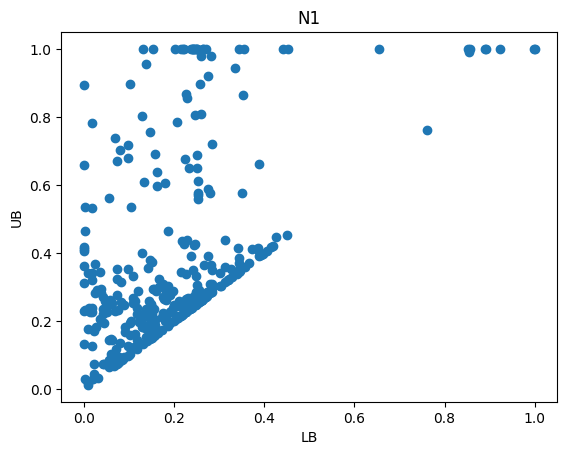

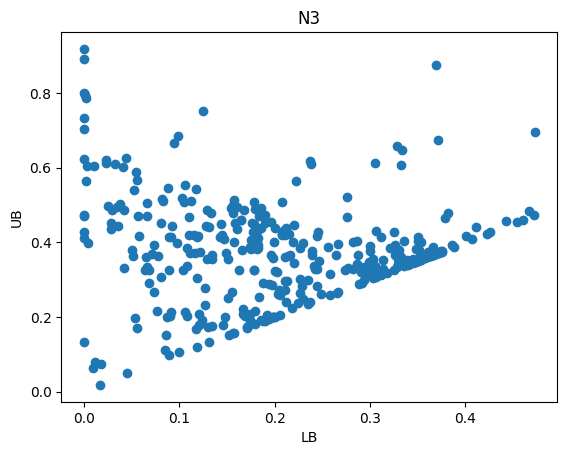

In [78]:
#plot the bounds of the evolved mechanisms that succeed for all 9 initial conditions


plt.scatter(allsuccessbounds[:,0],allsuccessbounds[:,2])
plt.title("N1")
plt.xlabel("LB")
plt.ylabel("UB")
plt.show()
plt.scatter(allsuccessbounds[:,1],allsuccessbounds[:,3])
plt.title("N3")
plt.xlabel("LB")
plt.ylabel("UB")
plt.show()

In [88]:
print(np.unique(allsuccessidxs))
print(len(np.unique(allsuccessidxs)))
uniquesuccessidxs = np.unique(allsuccessidxs)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8. 10. 11. 12. 13. 14. 16. 17. 19. 21.
 22. 23. 25. 27. 29. 30. 31. 32. 33. 35. 37. 38. 40. 41. 42. 43. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 60. 61. 62. 63. 65. 66.
 67. 68. 69. 71. 72. 73. 74. 77. 78. 79. 80. 82. 83. 84. 85. 86. 87. 88.
 89. 91. 92. 93. 94. 96. 97. 98. 99.]
81


In [85]:
data = np.loadtxt("./allpyloricXgeneralist_test.dat")[:,-1]

In [94]:
gettingeasyslns = np.where(data == 1)[0]
# with limited resources, which solutions are very very easy to get all pyloric end points

uniqueandnontrivialslns = []

for i in range(len(uniquesuccessidxs)):
    easy = False
    for j in range(len(gettingeasyslns)):
        if uniquesuccessidxs[i] == gettingeasyslns[j]:
            easy=True
    if not easy:
        uniqueandnontrivialslns.append(uniquesuccessidxs[i].astype(int))
#add back in one of the easy ones
uniqueandnontrivialslns.append(gettingeasyslns[0].astype(int))

print(uniqueandnontrivialslns)
print(len(uniqueandnontrivialslns))

[0, 1, 2, 3, 4, 6, 7, 8, 11, 12, 16, 19, 21, 22, 23, 27, 29, 30, 31, 35, 37, 38, 40, 42, 43, 45, 47, 48, 55, 56, 58, 63, 65, 69, 72, 73, 74, 80, 82, 85, 87, 91, 92, 93, 94, 96, 97, 98, 99, 5]
50


In [103]:
#one example of a circuit with a lower bound in each 
np.where(allsuccessbounds[:,0]>.999)
# print(allsuccessbounds[[9,12]])

(array([9]),)

[ 0  1  2  3  4  5  6  7  8 11 12 16 19 21 22 23 27 29 30 31 35 37 38 40
 42 43 45 47 48 55 56 58 63 65 69 72 73 74 80 82 85 87 91 92 93 94 96 97
 98 99]
[ 2  4 11 12 19 21 22 31 35 38 45 55 56 58 69 82 93 94 97 98]


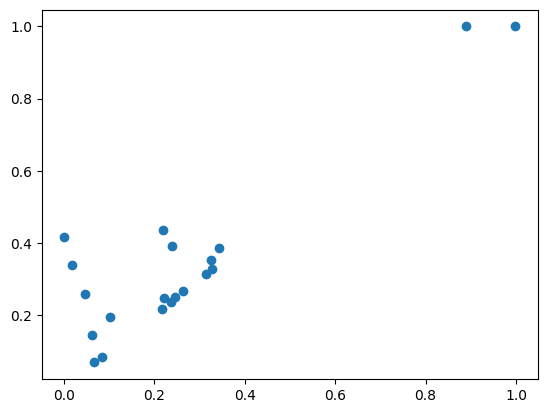

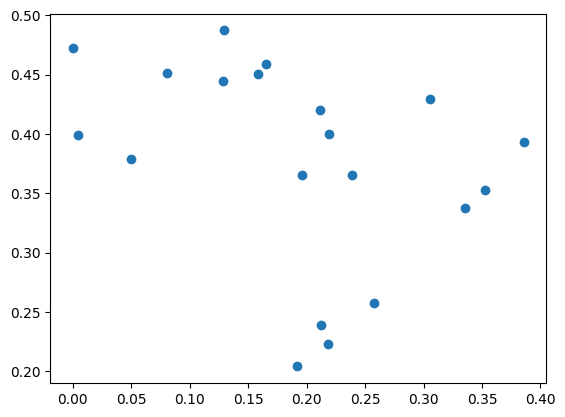

In [112]:
randomuniquenontrivialslns = np.sort(np.random.choice(uniqueandnontrivialslns,20,replace=False))
print(np.sort(uniqueandnontrivialslns))
print(randomuniquenontrivialslns)
plt.scatter(allsuccessbounds[randomuniquenontrivialslns,0],allsuccessbounds[randomuniquenontrivialslns,2])
plt.show()
plt.scatter(allsuccessbounds[randomuniquenontrivialslns,1],allsuccessbounds[randomuniquenontrivialslns,3])
plt.show()


In [ ]:
#which circuits invite HPs with different strategies (but both good ones)
lb1_var = np.std(evolved_bounds_all[:,:,0],axis=1)
# print(np.where(lb1_var>.1))
# for i in (np.where(lb1_var>.1)[0]):
#     print(i)
#     print(fitnesses[i])
#     print(evolved_bounds_all[i,:,0])
lb2_var = np.std(evolved_bounds_all[:,:,1],axis=1)
for i in (np.where(lb2_var>.1)[0]):
    print(i)
    print(fitnesses[i])1s
    print(evolved_bounds_all[i,:,1])
# print(lb2_var)

2
[21.5391 18.1396 22.9559 22.9445 22.9539]
[4.54377e-01 1.70089e-01 0.00000e+00 1.28197e-01 1.03703e-05]
3
[30.4481 29.646  29.2348 29.3726 28.7275]
[0.354266  0.143308  0.361977  0.12921   0.0921795]
5
[28.5095 29.3489 28.5216 28.0459 28.5916]
[0.345243  0.0228335 0.0537305 0.0885809 0.241291 ]
8
[25.7539 25.8927 26.0699 25.7195 25.7247]
[0.442227   0.00454248 0.00326272 0.426204   0.208063  ]
19
[33.3636 33.7916 35.6424 27.0968 31.0256]
[0.235268  0.362554  0.129767  0.0112006 0.273786 ]
36
[8.7854  7.46028 7.57265 7.91049 7.44914]
[0.436289  0.114224  0.0161169 0.173853  0.18655  ]
39
[21.3691 22.1294 22.9622 20.1458 17.6923]
[0.326814  0.346731  0.403331  0.306178  0.0699736]
42
[29.1589 26.0864 26.0878 29.894  28.8847]
[0.22651  0.124988 0.471973 0.142808 0.181167]
48
[16.2208 20.3659 26.0807 17.7467 19.2327]
[0.0807099 0.10821   0.411381  0.354825  0.341438 ]
49
[31.0281 30.689  31.6979 30.9202 32.3935]
[0.0378605 0.282249  0.0850448 0.281845  0.077005 ]
51
[32.0462 30.153  32.9

ones to look into for having two different strategies: (std>.1, all above fitness 25)
lower bounds n1:
11,17,42,51,78,89

lower bounds n3: (seems more lenient on n3 in general)
3,5,8,19,42,48,49,51,77,83,84,89,91,96,97,98,99

both bounds:
42,52,89


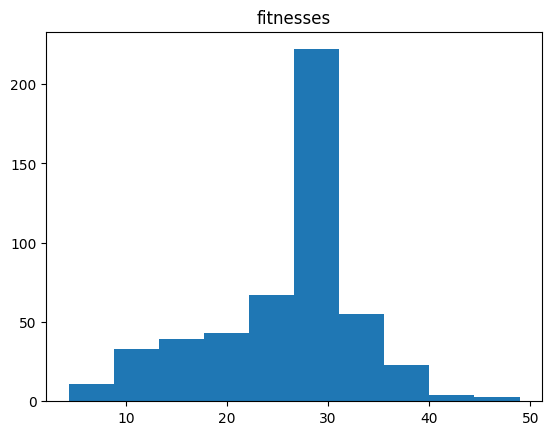

In [ ]:
plt.hist(fitnesses.flatten())
plt.title('fitnesses')
plt.show()
# print(np.where(fitnesses<25.3))

In [50]:
fitnessestiled = np.repeat(fitnesses,4).reshape((100,5,4))
print(fitnessestiled[0])

[[31.0139 31.0139 31.0139 31.0139]
 [31.08   31.08   31.08   31.08  ]
 [30.6977 30.6977 30.6977 30.6977]
 [30.9894 30.9894 30.9894 30.9894]
 [32.2025 32.2025 32.2025 32.2025]]


In [53]:
evolved_bounds_capped = np.ma.masked_where(fitnessestiled<25.3,evolved_bounds_all)

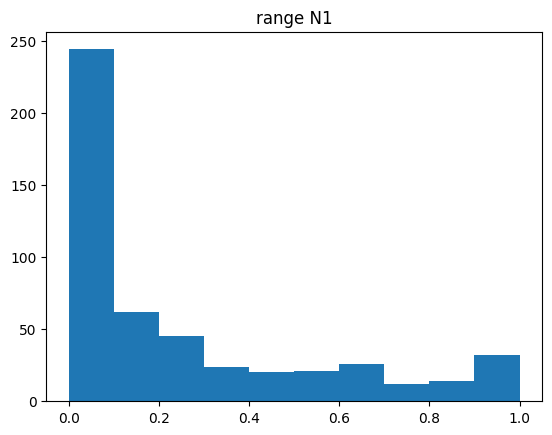

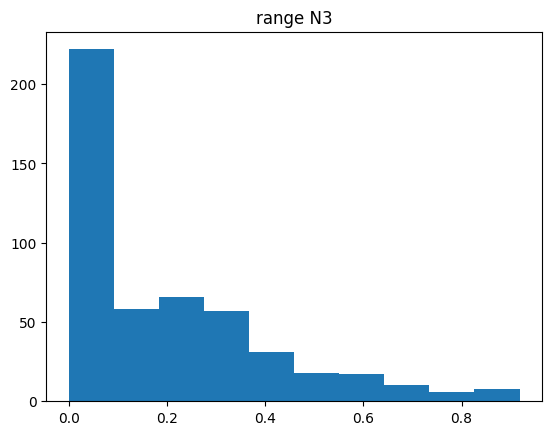

In [54]:
plt.hist(evolved_bounds_capped[:,:,2].flatten())
plt.title('range N1')
plt.show()
plt.title('range N3')
plt.hist(evolved_bounds_capped[:,:,3].flatten())
plt.show()

Then, we evolve generalists to deal with representatives from each of those categories and analyze them

In [48]:
pete33 = np.loadtxt("allpyloricX33.dat")
generalist25 = np.loadtxt("allpyloricXgeneralist25.dat")
generalist72 = np.loadtxt("allpyloricXgeneralist72.dat")
point25 = np.loadtxt("allpyloricXpoint25.dat")

In [20]:
all_pyloric = np.zeros((90,4))
all_pyloric[:,0] = point25[:,-1]
all_pyloric[:,1] = pete33[:,-1]
all_pyloric[:,2] = generalist25[:,-1]
all_pyloric[:,3] = generalist72[:,-1]

In [49]:
pete33 = pete33[:,:-1]
generalist25 = generalist25[:,:-1]
generalist72 = generalist72[:,:-1]
point25 = point25[:,:-1]

In [50]:
all_pyl_sum = np.sum(all_pyloric,axis=1)
print(all_pyl_sum)

[2. 2. 0. 3. 3. 3. 0. 3. 0. 0. 2. 0. 1. 4. 4. 0. 0. 3. 0. 3. 0. 1. 4. 0.
 0. 0. 0. 0. 0. 0. 4. 1. 1. 2. 0. 4. 0. 4. 4. 0. 0. 4. 3. 0. 0. 0. 4. 0.
 0. 4. 1. 4. 4. 2. 4. 4. 4. 0. 4. 0. 4. 3. 4. 4. 0. 1. 3. 2. 2. 0. 0. 4.
 3. 2. 0. 0. 0. 2. 4. 4. 0. 0. 0. 1. 2. 1. 3. 1. 4. 3.]


I hypothesize that there are some solutions that are incredibly easy to maintain. 

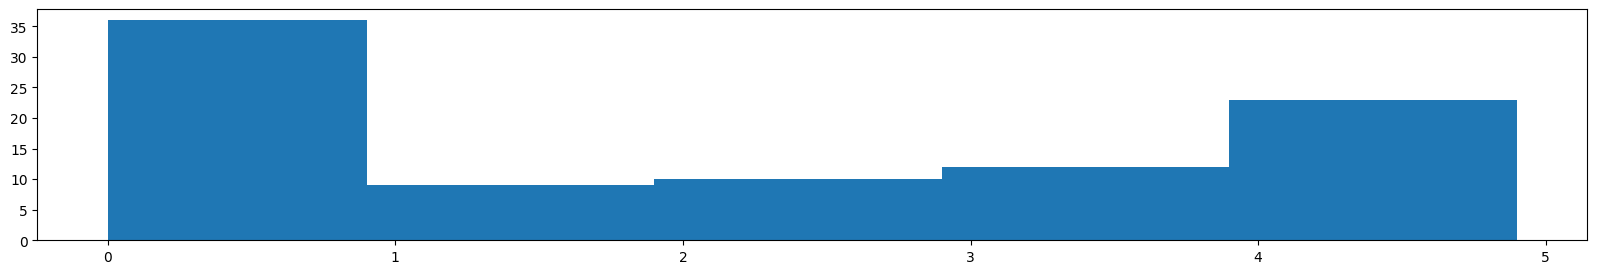

In [51]:
plt.hist(all_pyl_sum, bins=[0,.9,1.9,2.9,3.9,4.9])
plt.show()

In [52]:
pyl_sum_33 = np.sum(pete33,axis=1)
pyl_sum_25 = np.sum(generalist25,axis=1)
pyl_sum_72 = np.sum(generalist72,axis=1)
pyl_sum_point25 = np.sum(point25,axis=1)

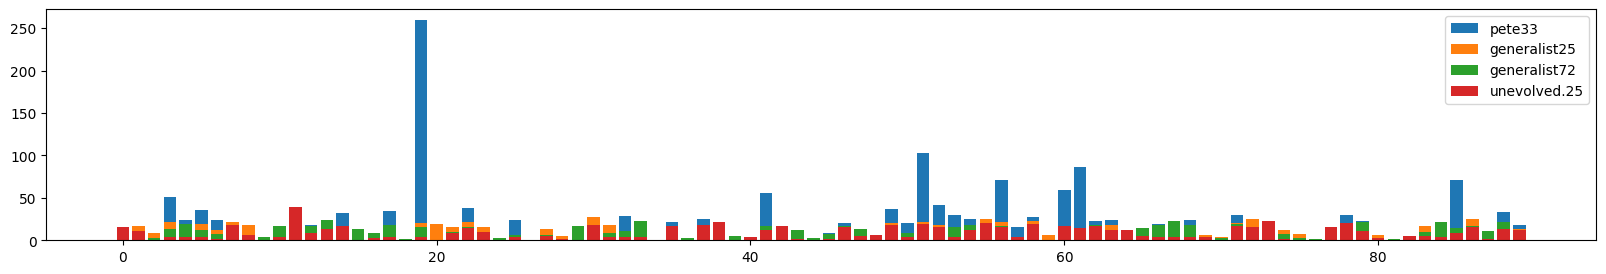

In [53]:
idxs = np.arange(0,90,1)
plt.bar(idxs,pyl_sum_33,label="pete33")
plt.bar(idxs,pyl_sum_25,label="generalist25")
plt.bar(idxs,pyl_sum_72,label="generalist72")
plt.bar(idxs,pyl_sum_point25,label="unevolved.25")
plt.legend()
plt.show()

In [54]:
pyl_num_33 = np.sum(pete33>.3,axis=1)
pyl_num_25 = np.sum(generalist25>.3,axis=1)
pyl_num_72 = np.sum(generalist72>.3,axis=1)
pyl_num_point25 = np.sum(point25>.3,axis=1)

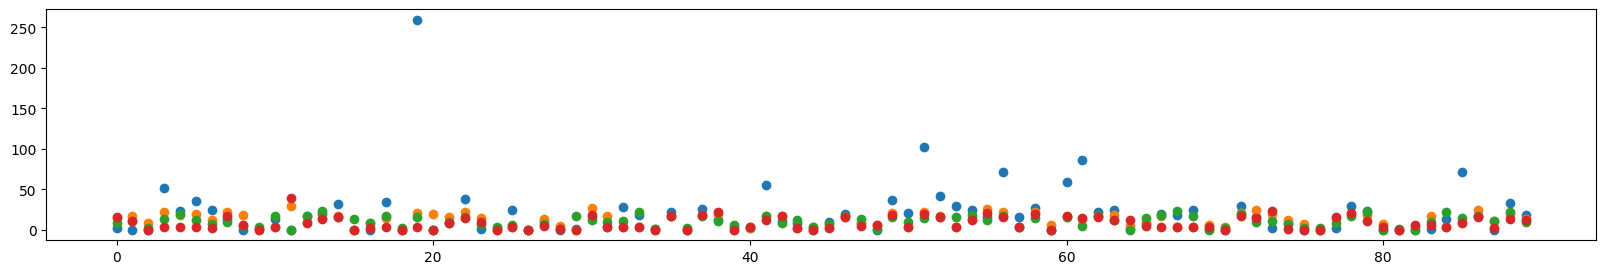

In [55]:
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(idxs,pyl_sum_33)
plt.scatter(idxs,pyl_sum_25)
plt.scatter(idxs,pyl_sum_72)
plt.scatter(idxs,pyl_sum_point25)
plt.show()

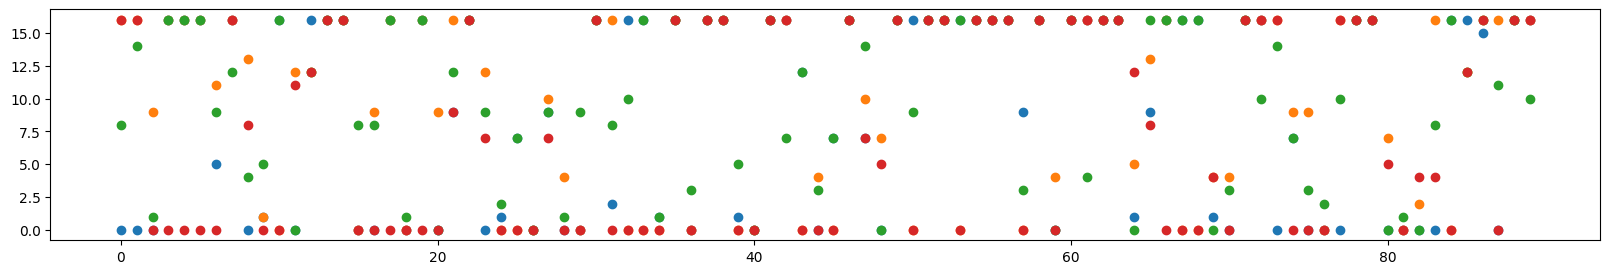

In [56]:
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(idxs,pyl_num_33)
plt.scatter(idxs,pyl_num_25)
plt.scatter(idxs,pyl_num_72)
plt.scatter(idxs,pyl_num_point25)
plt.show()

In [60]:
print(pyl_num_33[np.where(pyl_num_25!=pyl_num_33)[0]])
print(pyl_num_25[np.where(pyl_num_25!=pyl_num_33)[0]])

[ 0  0  0  5  0 16  0 16  0  0  9  0  1  7  9  0  2 16 16  1  1 12  0  7
  7  0 16 16  9  0  1  9 16 16  1  0  0  7  0  0  0  0  0 16 16 15  0]
[16 16  9 11 13  0 12 12  9  9 16 12  0  0 10  4 16  0  0  0  0  0  4  0
 10  7  0  0  0  4  5 13  0  0  4  4 16  9  9 16  7  2 16  0 12 16 16]


In [66]:
#most difficult pyloric slices:
thresh = 2

print(np.where(pyl_num_33<thresh))
print(np.where(pyl_num_25 < thresh))
print(np.where(pyl_num_72 <thresh))

print("toughies: 18,26,34,40,81")

print(pyl_num_33[[18,26,34,40,81]])
print(pyl_num_25[[18,26,34,40,81]])
print(pyl_num_72[[18,26,34,40,81]])

print("toughest: 26, 40")

(array([ 0,  1,  2,  8,  9, 11, 15, 16, 18, 20, 23, 24, 26, 28, 29, 34, 36,
       39, 40, 44, 48, 59, 64, 69, 70, 73, 75, 76, 77, 80, 81, 82, 83, 87]),)
(array([ 9, 10, 15, 18, 24, 25, 26, 29, 32, 33, 34, 36, 39, 40, 43, 45, 50,
       53, 57, 67, 68, 76, 81, 84]),)
(array([ 2, 11, 18, 20, 26, 28, 34, 40, 48, 59, 64, 69, 80, 81, 82]),)
toughies: 18,26,34,40,81
[0 0 1 0 0]
[0 0 0 0 0]
[1 0 1 0 1]
toughest: 26, 40
